[*********************100%***********************]  15 of 15 completed
[*********************100%***********************]  15 of 15 completed


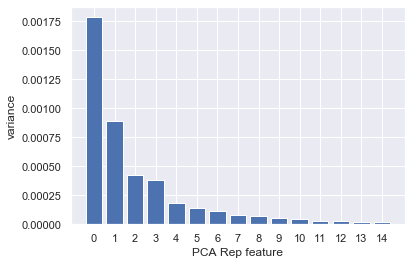

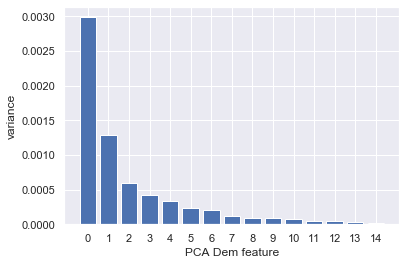

In [33]:
#Nov 2016 - Jan 2017
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

rep = yf.download(tickers="AMZN AXP C FB GOOGL CVX COP HON MRO MRK PYPL QCOM CRM V GILD", start="2016-11-01", end="2017-01-30", interval="1d")
dem = yf.download(tickers="EXC F APTV STZ EL SPWR KO WMT HD NEE CSX MCD SPG FSLR NSC", start="2016-11-01", end="2017-01-30", interval="1d")
sns.set()
rep_returns = rep['Adj Close'].pct_change()
dem_returns = dem['Adj Close'].pct_change()
rep_returns = rep_returns.dropna()
dem_returns = dem_returns.dropna()
pca_rep = PCA() 
pca_rep.fit(rep_returns) 
features = range(pca_rep.n_components_)
plt.bar(features, pca_rep.explained_variance_)
plt.xlabel('PCA Rep feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


pca_dem = PCA() 
pca_dem.fit(dem_returns) 
features = range(pca_dem.n_components_)
plt.bar(features, pca_dem.explained_variance_)
plt.xlabel('PCA Dem feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()





In [ ]:
print("Therefore select top 3")

In [34]:
rep_returns.describe()

,AMZN,AXP,C,COP,CRM,CVX,FB,GILD,GOOGL,HON,MRK,MRO,PYPL,QCOM,V
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.001033,0.002692,0.002591,0.001646,0.000827,0.001018,0.000303,-0.000382,0.000447,0.001589,0.000811,0.004343,-0.000633,-0.003629,0.000526
std,0.014599,0.010225,0.014753,0.020435,0.015749,0.008524,0.015133,0.014160,0.012092,0.007775,0.014026,0.036796,0.010538,0.023255,0.012061
min,-0.038218,-0.015915,-0.023071,-0.039450,-0.049167,-0.023681,-0.056381,-0.021061,-0.031406,-0.013379,-0.020820,-0.050546,-0.031687,-0.127226,-0.042746
25%,-0.006758,-0.004036,-0.008017,-0.008379,-0.008270,-0.003239,-0.005989,-0.008827,-0.005861,-0.002374,-0.007992,-0.012954,-0.006967,-0.007714,-0.003686
50%,0.001057,0.002078,0.000511,-0.000592,-0.000212,0.000000,-0.000625,-0.004545,0.000212,0.000736,-0.000085,0.000287,-0.000126,0.000687,0.000877
75%,0.006890,0.007032,0.013671,0.009299,0.007327,0.005762,0.011714,0.004345,0.006288,0.004039,0.007127,0.013337,0.006904,0.007346,0.006112
max,0.039574,0.027382,0.039155,0.096993,0.034936,0.022235,0.040591,0.059832,0.029128,0.030424,0.060651,0.208027,0.020732,0.034545,0.028531


In [35]:
# Select: MRO AXP C for Rep

dem_returns.describe()
#select : NSC HD MCD

,APTV,CSX,EL,EXC,F,FSLR,HD,KO,MCD,NEE,NSC,SPG,SPWR,STZ,WMT
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.001430,0.008043,-0.000925,0.001352,0.001394,-0.004069,0.002542,-0.000117,0.001683,-0.000126,0.004667,-0.000291,-0.000924,-0.001362,-0.000540
std,0.021640,0.033687,0.013137,0.016789,0.016733,0.034148,0.010074,0.008815,0.007263,0.012707,0.014266,0.011632,0.043102,0.020501,0.009909
min,-0.064613,-0.031767,-0.054461,-0.049194,-0.032838,-0.149581,-0.025613,-0.031464,-0.017252,-0.061357,-0.024106,-0.032812,-0.141689,-0.075893,-0.030817
25%,-0.011291,-0.006857,-0.009101,-0.006330,-0.009352,-0.016300,-0.002774,-0.004373,-0.002722,-0.005106,-0.003211,-0.007809,-0.024352,-0.006443,-0.006809
50%,0.001626,0.003203,0.000447,0.000141,-0.001232,-0.004194,0.000777,-0.000478,0.001275,0.001024,0.002945,0.000498,-0.009899,0.002862,-0.000640
75%,0.013649,0.013097,0.008681,0.009396,0.009521,0.009979,0.006514,0.004816,0.005742,0.007231,0.010841,0.007290,0.021484,0.009793,0.005692
max,0.068002,0.234002,0.019489,0.042249,0.046068,0.076664,0.028895,0.024890,0.031868,0.025534,0.040466,0.027861,0.142241,0.039727,0.022688


[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
**************Democratic 2016/17********************
[['Return', 110.8207075490224, 'Volatility', 10.824971391617787, 'Sharpe Ratio', 10.237505813164121]]
**************Republic 2016/17********************
[['Return', 124.17879309439392, 'Volatility', 25.934517245254785, 'Sharpe Ratio', 4.788166747816168]]


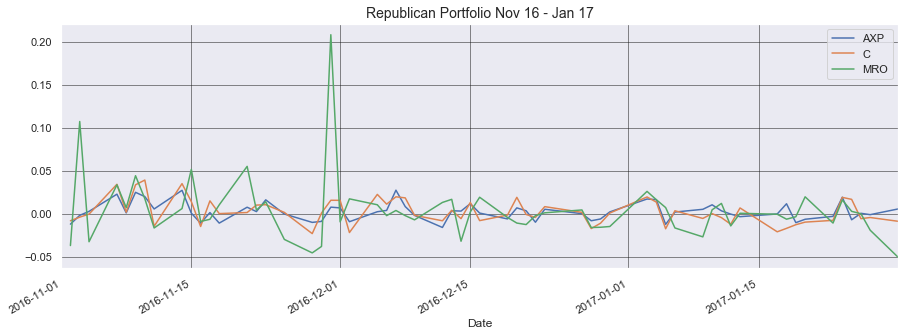

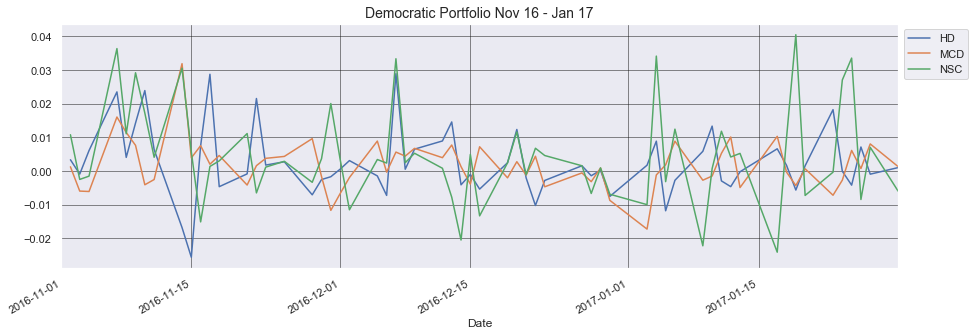

In [66]:
#Nov 2016 - Jan 2017
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
rep_top3 = yf.download(tickers="MRO AXP C", start="2016-11-01", end="2017-01-30", interval="1d")
dem_top3 = yf.download(tickers="NSC HD MCD", start="2016-11-01", end="2017-01-30", interval="1d")
sns.set()
rep_returns = rep_top3['Adj Close'].pct_change()
dem_returns = dem_top3['Adj Close'].pct_change()
weights = np.array([0.333,0.333,0.333])
rep_portfolio_return = (rep_returns['MRO'].mean()+rep_returns['AXP'].mean()+rep_returns['C'].mean())/3
dem_portfolio_return = (dem_returns['NSC'].mean()+dem_returns['HD'].mean()+dem_returns['MCD'].mean())/3
rep_annual_return = (pow(1+rep_portfolio_return,252)-1)*100
dem_annual_return = (pow(1+dem_portfolio_return,252)-1)*100
rep_cov_matrix = rep_returns.cov()
dem_cov_matrix = dem_returns.cov()
rep_portfolio_std_dev = (np.sqrt(np.dot(weights.T,np.dot(rep_cov_matrix, weights))))*np.sqrt(252)*100
dem_portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(dem_cov_matrix, weights)))*np.sqrt(252)*100
rep_sharpe = rep_annual_return/rep_portfolio_std_dev;
dem_sharpe = dem_annual_return/dem_portfolio_std_dev;
print("**************Democratic 2016/17********************")
d =[["Return",dem_annual_return]+    ["Volatility",dem_portfolio_std_dev]+    ["Sharpe Ratio",dem_sharpe]]
print(d)
print("**************Republic 2016/17********************")
r = [["Return",rep_annual_return]+     ["Volatility",rep_portfolio_std_dev]+     ["Sharpe Ratio",rep_sharpe]]
print(r)
rep_returns.plot(figsize=(15, 5))
plt.grid(which="major", color='k', linewidth=0.5)
plt.title("Republican Portfolio Nov 16 - Jan 17", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
dem_returns.plot(figsize=(15, 5))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Democratic Portfolio Nov 16 - Jan 17", fontsize=14)
plt.grid(which="major", color='k', linewidth=0.5)
plt.show()



[*********************100%***********************]  14 of 14 completed
[*********************100%***********************]  15 of 15 completed


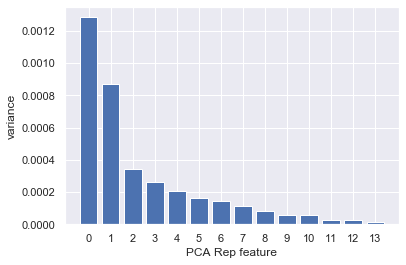

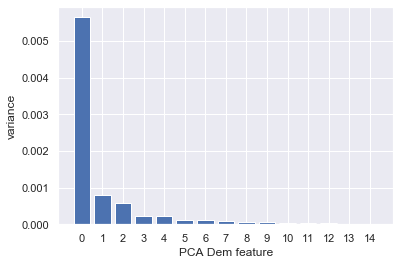

In [45]:
#Nov 2012 - Jan 2013
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

rep = yf.download(tickers="AMZN AXP C FB GOOGL CVX COP HON MRO MRK QCOM CRM V GILD", start="2012-11-01", end="2013-01-30", interval="1d")
dem = yf.download(tickers="EXC F APTV STZ EL SPWR KO WMT HD NEE CSX MCD SPG FSLR NSC", start="2012-11-01", end="2013-01-30", interval="1d")
sns.set()
rep_returns = rep['Adj Close'].pct_change()
dem_returns = dem['Adj Close'].pct_change()
rep_returns = rep_returns.dropna()
dem_returns = dem_returns.dropna()
pca_rep = PCA() 
pca_rep.fit(rep_returns) 
features = range(pca_rep.n_components_)
plt.bar(features, pca_rep.explained_variance_)
plt.xlabel('PCA Rep feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


pca_dem = PCA() 
pca_dem.fit(dem_returns) 
features = range(pca_dem.n_components_)
plt.bar(features, pca_dem.explained_variance_)
plt.xlabel('PCA Dem feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()






In [46]:
#select top 2
dem_returns.describe()

,APTV,CSX,EL,EXC,F,FSLR,HD,KO,MCD,NEE,NSC,SPG,SPWR,STZ,WMT
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.003044,0.001216,0.000729,-0.000839,0.002576,0.002539,0.001422,0.000232,0.001623,0.000678,0.002016,0.001095,0.010801,0.001647,-0.000720
std,0.012997,0.013512,0.011658,0.012116,0.016359,0.032940,0.011405,0.009355,0.007367,0.007768,0.012615,0.007546,0.071927,0.016837,0.009952
min,-0.023737,-0.030201,-0.021486,-0.030112,-0.046444,-0.089293,-0.030136,-0.018706,-0.019917,-0.015908,-0.024715,-0.016534,-0.126002,-0.025441,-0.036321
25%,-0.005180,-0.007759,-0.008217,-0.008955,-0.006702,-0.017640,-0.004115,-0.005793,-0.002685,-0.004883,-0.007068,-0.002838,-0.010765,-0.008156,-0.006506
50%,0.002565,0.001491,0.001279,-0.001277,0.001795,-0.000877,0.000616,-0.000135,0.001630,-0.000430,0.002034,0.001007,0.002506,-0.001675,-0.000921
75%,0.010958,0.006419,0.007398,0.007227,0.012598,0.026712,0.007015,0.004496,0.006795,0.005272,0.011853,0.005909,0.025492,0.010616,0.005084
max,0.038270,0.041807,0.033316,0.026251,0.045531,0.076727,0.036298,0.037241,0.021653,0.019222,0.030098,0.020976,0.479608,0.061522,0.019016


In [47]:
#select APTV/SPWR and AMZN/GILD
rep_returns.describe()

,AMZN,AXP,C,COP,CRM,CVX,FB,GILD,GOOGL,HON,MRK,MRO,QCOM,V
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.002850,0.000826,0.001842,0.000790,0.002886,0.000927,0.006971,0.002971,0.001618,0.001704,-0.000692,0.001852,0.001208,0.001443
std,0.017970,0.010667,0.018651,0.009524,0.017482,0.010418,0.032166,0.020689,0.013167,0.009755,0.010857,0.014159,0.015205,0.009557
min,-0.056840,-0.028327,-0.062906,-0.024906,-0.028686,-0.027723,-0.051740,-0.029939,-0.022622,-0.022194,-0.034357,-0.040051,-0.046685,-0.021834
25%,-0.007244,-0.005707,-0.007216,-0.005111,-0.006684,-0.006087,-0.013442,-0.005635,-0.006082,-0.003106,-0.007704,-0.005473,-0.006594,-0.005144
50%,0.002848,0.001795,-0.000244,-0.000689,0.002483,0.002276,0.006441,0.000673,-0.000420,0.000145,0.001487,0.000148,0.000481,0.000756
75%,0.015330,0.008747,0.008781,0.008439,0.009882,0.007594,0.024170,0.006959,0.005253,0.008649,0.005404,0.012497,0.006506,0.006063
max,0.047667,0.025664,0.063284,0.021038,0.088280,0.021281,0.125881,0.137210,0.054960,0.025164,0.023947,0.032290,0.046718,0.025069


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed
**************Democratic 2012/13********************
[['Return', 468.8598979217794, 'Volatility', 58.18071183701694, 'Sharpe Ratio', 8.058682733810617]]
**************Republic 2012/13********************
[['Return', 108.00664092272396, 'Volatility', 23.786292196670065, 'Sharpe Ratio', 4.540709414889145]]


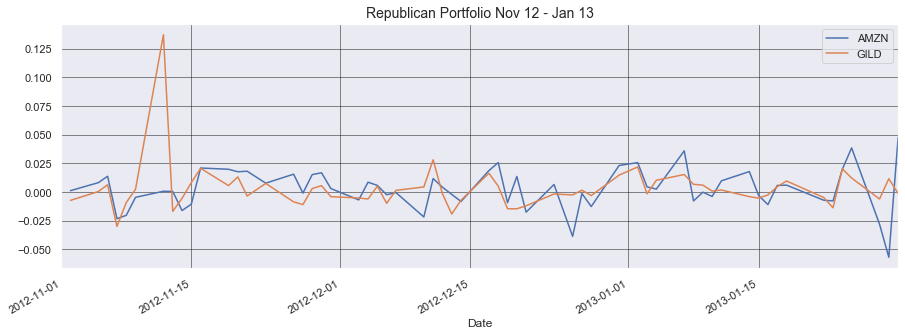

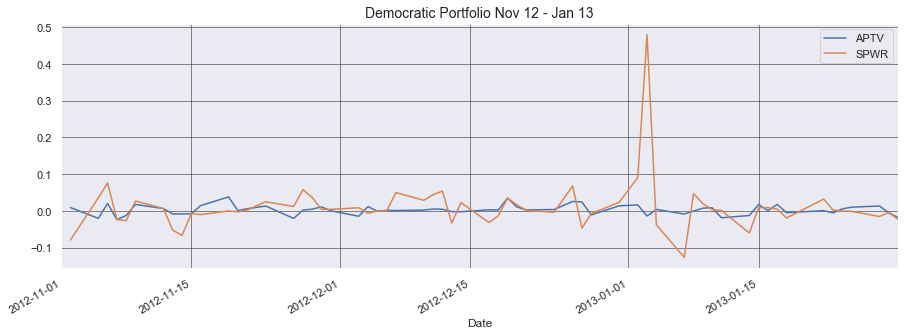

In [65]:
#Nov 2012 - Jan 2013
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
rep_top3 = yf.download(tickers="AMZN GILD", start="2012-11-01", end="2013-01-30", interval="1d")
dem_top3 = yf.download(tickers="APTV SPWR", start="2012-11-01", end="2013-01-30", interval="1d")
sns.set()
rep_returns = rep_top3['Adj Close'].pct_change()
dem_returns = dem_top3['Adj Close'].pct_change()
weights = np.array([0.5,0.5])
rep_portfolio_return = (rep_returns['AMZN'].mean()+rep_returns['GILD'].mean())/2
dem_portfolio_return = (dem_returns['APTV'].mean()+dem_returns['SPWR'].mean())/2
rep_annual_return = (pow(1+rep_portfolio_return,252)-1)*100
dem_annual_return = (pow(1+dem_portfolio_return,252)-1)*100
rep_cov_matrix = rep_returns.cov()
dem_cov_matrix = dem_returns.cov()
rep_portfolio_std_dev = (np.sqrt(np.dot(weights.T,np.dot(rep_cov_matrix, weights))))*np.sqrt(252)*100
dem_portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(dem_cov_matrix, weights)))*np.sqrt(252)*100
rep_sharpe = rep_annual_return/rep_portfolio_std_dev;
dem_sharpe = dem_annual_return/dem_portfolio_std_dev;
print("**************Democratic 2012/13********************")
d =[["Return",dem_annual_return]+    ["Volatility",dem_portfolio_std_dev]+    ["Sharpe Ratio",dem_sharpe]]
print(d)
print("**************Republic 2012/13********************")
r = [["Return",rep_annual_return]+     ["Volatility",rep_portfolio_std_dev]+     ["Sharpe Ratio",rep_sharpe]]
print(r)
rep_returns.plot(figsize=(15, 5))
plt.grid(which="major", color='k', linewidth=0.5)
plt.title("Republican Portfolio Nov 12 - Jan 13", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
dem_returns.plot(figsize=(15, 5))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Democratic Portfolio Nov 12 - Jan 13", fontsize=14)
plt.grid(which="major", color='k', linewidth=0.5)
plt.show()



[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  12 of 12 completed


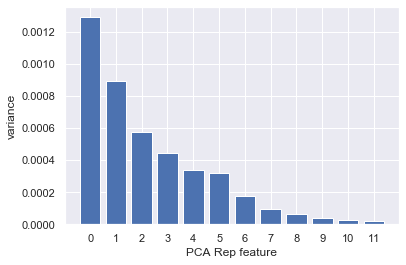

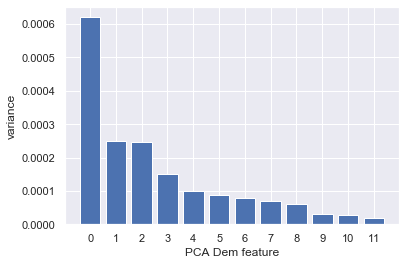

In [50]:
#Nov 2004 - Jan 2005
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

rep = yf.download(tickers="AMZN AXP C GOOGL CVX COP HON MRO MRK QCOM CRM GILD", start="2004-11-01", end="2005-01-30", interval="1d")
dem = yf.download(tickers="EXC F STZ EL KO WMT HD NEE CSX MCD SPG NSC", start="2004-11-01", end="2005-01-30", interval="1d")
sns.set()
rep_returns = rep['Adj Close'].pct_change()
dem_returns = dem['Adj Close'].pct_change()
rep_returns = rep_returns.dropna()
dem_returns = dem_returns.dropna()
pca_rep = PCA() 
pca_rep.fit(rep_returns) 
features = range(pca_rep.n_components_)
plt.bar(features, pca_rep.explained_variance_)
plt.xlabel('PCA Rep feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


pca_dem = PCA() 
pca_dem.fit(dem_returns) 
features = range(pca_dem.n_components_)
plt.bar(features, pca_dem.explained_variance_)
plt.xlabel('PCA Dem feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()






In [51]:
#top 3 - STZ/EL/NEE & AMZN/C/COP
dem_returns.describe()

,CSX,EL,EXC,F,HD,KO,MCD,NEE,NSC,SPG,STZ,WMT
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.001378,0.002261,0.001771,0.000078,-0.000189,0.000615,0.001635,0.001861,0.000119,0.000145,0.003982,-0.000347
std,0.012643,0.010014,0.012805,0.011584,0.009937,0.006984,0.009358,0.009702,0.015184,0.014280,0.017800,0.010158
min,-0.021597,-0.020180,-0.027881,-0.033740,-0.027826,-0.013963,-0.021703,-0.019244,-0.056908,-0.044269,-0.039523,-0.039226
25%,-0.005952,-0.004798,-0.007208,-0.004240,-0.006665,-0.004638,-0.005376,-0.004573,-0.007405,-0.007750,-0.005422,-0.006557
50%,0.000795,0.001075,0.003670,-0.001403,-0.001189,0.000967,0.002731,0.001395,-0.001772,0.001274,0.002613,-0.000380
75%,0.007818,0.007956,0.009880,0.005622,0.007754,0.005596,0.008661,0.007100,0.007778,0.009445,0.008896,0.005571
max,0.053258,0.031739,0.028428,0.040000,0.018913,0.016344,0.024507,0.024559,0.042030,0.031422,0.070517,0.032672


In [52]:
rep_returns.describe()

,AMZN,AXP,C,COP,CRM,CVX,GILD,GOOGL,HON,MRK,MRO,QCOM
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.003307,0.000035,0.001482,0.001396,-0.007275,0.000442,-0.001249,-0.000068,0.000459,0.000313,0.000795,-0.001590
std,0.023768,0.007651,0.009037,0.012512,0.032194,0.012803,0.015838,0.029066,0.011755,0.021865,0.012104,0.018882
min,-0.053459,-0.015024,-0.016554,-0.037298,-0.144914,-0.030661,-0.031576,-0.083108,-0.019280,-0.101347,-0.031440,-0.080107
25%,-0.012970,-0.005314,-0.004671,-0.005844,-0.018055,-0.007746,-0.012846,-0.018411,-0.007787,-0.008946,-0.007846,-0.006342
50%,0.004257,-0.001242,0.000828,0.002646,-0.008100,0.000389,-0.002082,-0.000256,-0.001372,0.000731,0.003744,0.000721
75%,0.015315,0.004148,0.006857,0.010271,0.006142,0.008940,0.007217,0.015769,0.005358,0.011886,0.009590,0.007889
max,0.085281,0.020601,0.026592,0.024811,0.097188,0.031180,0.035915,0.090313,0.032286,0.042978,0.022116,0.034599


[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
**************Democratic 2004/05********************
[['Return', 97.33923913688913, 'Volatility', 15.05409558763254, 'Sharpe Ratio', 6.465963934549259]]
**************Republic 2004/05********************
[['Return', 68.0423135154683, 'Volatility', 16.312352390110295, 'Sharpe Ratio', 4.171214052285945]]


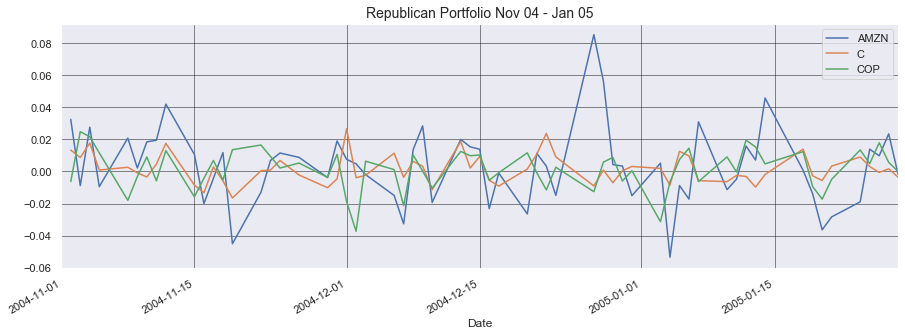

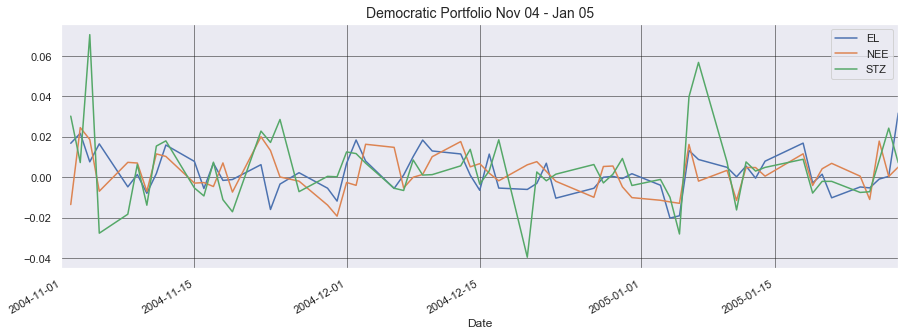

In [67]:
#Nov 2004 - Jan 2005
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
rep_top3 = yf.download(tickers="AMZN C COP", start="2004-11-01", end="2005-01-30", interval="1d")
dem_top3 = yf.download(tickers="STZ EL NEE", start="2004-11-01", end="2005-01-30", interval="1d")
sns.set()
rep_returns = rep_top3['Adj Close'].pct_change()
dem_returns = dem_top3['Adj Close'].pct_change()
weights = np.array([0.333,0.333,0.333])
rep_portfolio_return = (rep_returns['AMZN'].mean()+rep_returns['C'].mean()+rep_returns['COP'].mean())/3
dem_portfolio_return = (dem_returns['STZ'].mean()+dem_returns['EL'].mean()+dem_returns['NEE'].mean())/3
rep_annual_return = (pow(1+rep_portfolio_return,252)-1)*100
dem_annual_return = (pow(1+dem_portfolio_return,252)-1)*100
rep_cov_matrix = rep_returns.cov()
dem_cov_matrix = dem_returns.cov()
rep_portfolio_std_dev = (np.sqrt(np.dot(weights.T,np.dot(rep_cov_matrix, weights))))*np.sqrt(252)*100
dem_portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(dem_cov_matrix, weights)))*np.sqrt(252)*100
rep_sharpe = rep_annual_return/rep_portfolio_std_dev;
dem_sharpe = dem_annual_return/dem_portfolio_std_dev;
print("**************Democratic 2004/05********************")
d =[["Return",dem_annual_return]+    ["Volatility",dem_portfolio_std_dev]+    ["Sharpe Ratio",dem_sharpe]]
print(d)
print("**************Republic 2004/05********************")
r = [["Return",rep_annual_return]+     ["Volatility",rep_portfolio_std_dev]+     ["Sharpe Ratio",rep_sharpe]]
print(r)
rep_returns.plot(figsize=(15, 5))
plt.grid(which="major", color='k', linewidth=0.5)
plt.title("Republican Portfolio Nov 04 - Jan 05", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
dem_returns.plot(figsize=(15, 5))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Democratic Portfolio Nov 04 - Jan 05", fontsize=14)
plt.grid(which="major", color='k', linewidth=0.5)
plt.show()



[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  12 of 12 completed


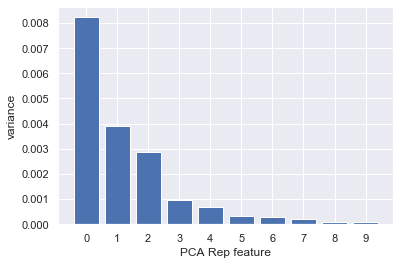

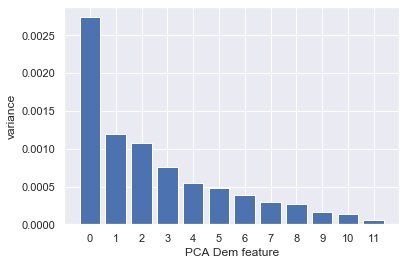

In [55]:
#Nov 2000 - Jan 2001
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

rep = yf.download(tickers="AMZN AXP C CVX COP HON MRO MRK QCOM GILD", start="2000-11-01", end="2001-01-30", interval="1d")
dem = yf.download(tickers="EXC F STZ EL KO WMT HD NEE CSX MCD SPG NSC", start="2000-11-01", end="2001-01-30", interval="1d")
sns.set()
rep_returns = rep['Adj Close'].pct_change()
dem_returns = dem['Adj Close'].pct_change()
rep_returns = rep_returns.dropna()
dem_returns = dem_returns.dropna()
pca_rep = PCA() 
pca_rep.fit(rep_returns) 
features = range(pca_rep.n_components_)
plt.bar(features, pca_rep.explained_variance_)
plt.xlabel('PCA Rep feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


pca_dem = PCA() 
pca_dem.fit(dem_returns) 
features = range(pca_dem.n_components_)
plt.bar(features, pca_dem.explained_variance_)
plt.xlabel('PCA Dem feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()






In [56]:
#top 3 - STZ/SPG/WMT & QCOM/C/CVX
dem_returns.describe()

,CSX,EL,EXC,F,HD,KO,MCD,NEE,NSC,SPG,STZ,WMT
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.002380,-0.002443,0.000822,0.002276,0.001461,-0.000436,-0.000819,-0.001202,0.001971,0.003056,0.005669,0.002892
std,0.023992,0.024932,0.025828,0.033874,0.038697,0.024745,0.022852,0.019182,0.024047,0.009889,0.018988,0.032494
min,-0.046875,-0.089362,-0.072628,-0.069054,-0.073446,-0.079349,-0.062738,-0.079158,-0.053811,-0.022900,-0.045556,-0.072945
25%,-0.014962,-0.015593,-0.017501,-0.018893,-0.029312,-0.013086,-0.018683,-0.008265,-0.012793,-0.002640,-0.003511,-0.016957
50%,0.003359,-0.003534,0.005316,0.001507,0.001394,-0.002147,0.001896,-0.000441,0.004068,0.002604,0.004961,0.002881
75%,0.018171,0.008956,0.015406,0.027943,0.023180,0.013053,0.015193,0.011520,0.013893,0.007603,0.014869,0.019642
max,0.049479,0.058732,0.058210,0.093220,0.128944,0.078055,0.041833,0.035088,0.092920,0.034032,0.063010,0.091286


In [57]:
rep_returns.describe()

,AMZN,AXP,C,COP,CVX,GILD,HON,MRK,MRO,QCOM
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,-0.008331,-0.002801,0.001728,-0.001077,0.000204,-0.001944,-0.001573,-0.001451,-0.000047,0.007496
std,0.078216,0.030358,0.025896,0.019188,0.016685,0.061761,0.028157,0.019876,0.016805,0.063358
min,-0.131429,-0.074551,-0.052956,-0.057569,-0.042971,-0.148178,-0.064730,-0.046283,-0.040909,-0.137643
25%,-0.072786,-0.020493,-0.012389,-0.013846,-0.007386,-0.035999,-0.017809,-0.015885,-0.009390,-0.035774
50%,-0.003111,0.001241,0.001152,0.003166,0.001539,0.000883,-0.000649,-0.003213,0.000000,0.000871
75%,0.030740,0.018303,0.017539,0.010357,0.008058,0.041412,0.012960,0.015049,0.009340,0.051330
max,0.265766,0.077615,0.087871,0.032036,0.041471,0.122658,0.087571,0.045324,0.038840,0.186067


[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
**************Democratic 2000/01********************
[['Return', 164.83348724702535, 'Volatility', 21.719556100517305, 'Sharpe Ratio', 7.589173852549382]]
**************Republic 2000/01********************
[['Return', 120.49316623321941, 'Volatility', 42.657016756908654, 'Sharpe Ratio', 2.8246974447340967]]


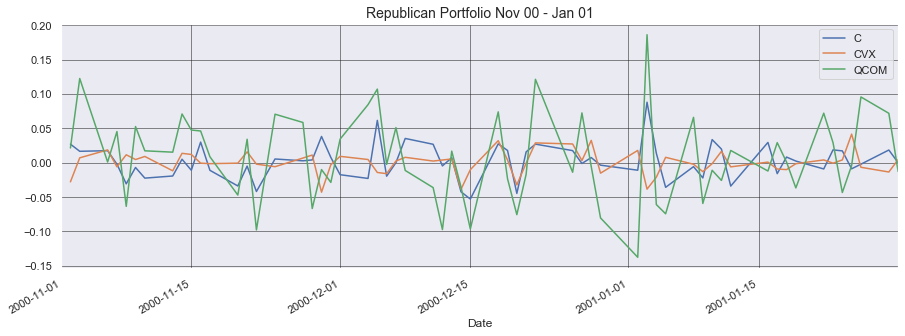

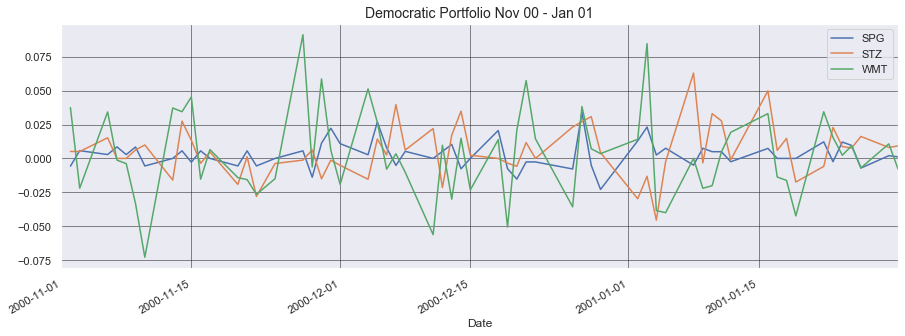

In [68]:
#Nov 2000 - Jan 2001
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
rep_top3 = yf.download(tickers="QCOM C CVX", start="2000-11-01", end="2001-01-30", interval="1d")
dem_top3 = yf.download(tickers="STZ SPG WMT", start="2000-11-01", end="2001-01-30", interval="1d")
sns.set()
rep_returns = rep_top3['Adj Close'].pct_change()
dem_returns = dem_top3['Adj Close'].pct_change()
weights = np.array([0.333,0.333,0.333])
rep_portfolio_return = (rep_returns['QCOM'].mean()+rep_returns['C'].mean()+rep_returns['CVX'].mean())/3
dem_portfolio_return = (dem_returns['STZ'].mean()+dem_returns['SPG'].mean()+dem_returns['WMT'].mean())/3
rep_annual_return = (pow(1+rep_portfolio_return,252)-1)*100
dem_annual_return = (pow(1+dem_portfolio_return,252)-1)*100
rep_cov_matrix = rep_returns.cov()
dem_cov_matrix = dem_returns.cov()
rep_portfolio_std_dev = (np.sqrt(np.dot(weights.T,np.dot(rep_cov_matrix, weights))))*np.sqrt(252)*100
dem_portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(dem_cov_matrix, weights)))*np.sqrt(252)*100
rep_sharpe = rep_annual_return/rep_portfolio_std_dev;
dem_sharpe = dem_annual_return/dem_portfolio_std_dev;
print("**************Democratic 2000/01********************")
d =[["Return",dem_annual_return]+    ["Volatility",dem_portfolio_std_dev]+    ["Sharpe Ratio",dem_sharpe]]
print(d)
print("**************Republic 2000/01********************")
r = [["Return",rep_annual_return]+     ["Volatility",rep_portfolio_std_dev]+     ["Sharpe Ratio",rep_sharpe]]
print(r)
rep_returns.plot(figsize=(15, 5))
plt.grid(which="major", color='k', linewidth=0.5)
plt.title("Republican Portfolio Nov 00 - Jan 01", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1))
dem_returns.plot(figsize=(15, 5))
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Democratic Portfolio Nov 00 - Jan 01", fontsize=14)
plt.grid(which="major", color='k', linewidth=0.5)
plt.show()

